In [1]:
from datetime import datetime
from datetime import timedelta

import pandas as pd
import matplotlib.pyplot as plt

## Categories

In [2]:
iris = pd.read_csv('./datasets/iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris['class'] = pd.Categorical(values=iris['class'], ordered=False, categories=iris['class'].unique())
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   class         150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [5]:
setosa = iris[iris['class'] == 'Iris-setosa']
setosa.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


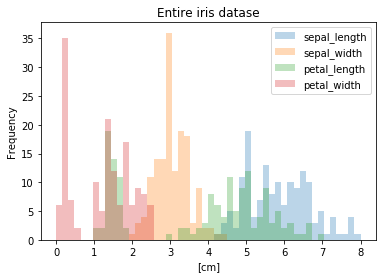

In [6]:
iris.plot(kind='hist', bins=50, range=(0, 8), alpha=0.3)
plt.title('Entire iris datase')
plt.xlabel('[cm]')
plt.show()

## Datetime format
Default format for datetime is ISO-8601 `yyyy:MM:dd HH:mm:ss`

DataFrame has resample method that allows to groub data by time period
* `min`, `T` - minute
* `H` - hour
* `D` - day
* `B` - bussiness day
* `W` - week
* `M` - month
* `Q` - quarter
* `A` - year

**Note** - if you want to specify different period, you can do like this `2W` - means a period of 2 weeks.

You can do *upsampling* - `df.resample('4H').ffill()` - samples data every 4 hours and uses ffill method (uses future closes value) to fill in empty samples.

When you do *downsampling* you have to specify how to compact data. For instance, if you have hourly data, and just need daily data, pandas will not guess how to throw out the 23 of 24 points. You must specify this in the method. One approach, for instance, could be to take the mean, as in `df.resample('D').mean()`.

In [7]:
austin_weather = pd.read_csv('./datasets/austin-weather-2010.csv', 
                             parse_dates=['Date'],
                             date_parser=lambda x: datetime.strptime(x, '%Y%m%d %H:%M')) \
    .set_index('Date') \
    .sort_index()
austin_weather

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0
...,...,...,...
2010-12-31 19:00:00,51.1,38.1,1.0
2010-12-31 20:00:00,49.0,37.9,1.0
2010-12-31 21:00:00,47.9,37.9,1.0


## Resampling

In [8]:
# Extract temperature data for August: august
# Downsample to obtain only the daily highest temperatures in August: august_highs
august_highs = austin_weather.loc['2010-Aug-01':'2010-Aug-31', 'Temperature'].resample('D').max()
august_highs.head()

Date
2010-08-01    95.0
2010-08-02    95.0
2010-08-03    95.1
2010-08-04    95.1
2010-08-05    95.1
Freq: D, Name: Temperature, dtype: float64

In [9]:
# Extract temperature data for February: february
# Downsample to obtain the daily lowest temperatures in February: february_lows
february_lows = austin_weather.loc['2010-Feb-01':'2010-Feb-28', 'Temperature'].resample('D').min()
february_lows.head()

Date
2010-02-01    43.8
2010-02-02    44.3
2010-02-03    44.6
2010-02-04    44.5
2010-02-05    44.3
Freq: D, Name: Temperature, dtype: float64

### Rolling

`.rolling(window=24).mean()` - calculates Rolling mean over a moving frame

In [10]:
# Extract the August 2010 data: august
august = austin_weather['Temperature']['2010-Aug-01':'2010-Aug-31']

# Resample to daily data, aggregating by max: daily_highs
daily_highs = august.resample('D').max()
print('type of resample =', type(august.resample('D')))
print('type of resamle("D").max() =', type(daily_highs))

# Use a rolling 7-day window with method chaining to smooth the daily high temperatures in August
daily_highs_smoothed = daily_highs.rolling(window=7).mean()
daily_highs_smoothed

type of resample = <class 'pandas.core.resample.DatetimeIndexResampler'>
type of resamle("D").max() = <class 'pandas.core.series.Series'>


Date
2010-08-01          NaN
2010-08-02          NaN
2010-08-03          NaN
2010-08-04          NaN
2010-08-05          NaN
2010-08-06          NaN
2010-08-07    95.114286
2010-08-08    95.142857
2010-08-09    95.171429
2010-08-10    95.171429
2010-08-11    95.157143
2010-08-12    95.128571
2010-08-13    95.100000
2010-08-14    95.042857
2010-08-15    94.971429
2010-08-16    94.900000
2010-08-17    94.857143
2010-08-18    94.828571
2010-08-19    94.814286
2010-08-20    94.785714
2010-08-21    94.757143
2010-08-22    94.742857
2010-08-23    94.714286
2010-08-24    94.642857
2010-08-25    94.542857
2010-08-26    94.428571
2010-08-27    94.271429
2010-08-28    94.100000
2010-08-29    93.914286
2010-08-30    93.742857
2010-08-31    93.571429
Freq: D, Name: Temperature, dtype: float64

### Interpolate upsampling

In [11]:
population = pd.read_csv('./datasets/world_population.csv', 
                         parse_dates=['Year'], 
                         date_parser=lambda year: datetime.strptime(year, '%Y')) \
    .set_index('Year') \
    .sort_index()
population

,Total Population
Year,
1960-01-01,3.034971e+09
1970-01-01,3.684823e+09
1980-01-01,4.436590e+09
1990-01-01,5.282716e+09
2000-01-01,6.115974e+09
2010-01-01,6.924283e+09


In [12]:
population.resample('A').first().head(12)

,Total Population
Year,
1960-12-31,3.034971e+09
1961-12-31,NaN
1962-12-31,NaN
1963-12-31,NaN
1964-12-31,NaN
1965-12-31,NaN
1966-12-31,NaN
1967-12-31,NaN
1968-12-31,NaN


In [13]:
population.resample('A').first().interpolate('linear').head(12)

,Total Population
Year,
1960-12-31,3.034971e+09
1961-12-31,3.099956e+09
1962-12-31,3.164941e+09
1963-12-31,3.229926e+09
1964-12-31,3.294911e+09
1965-12-31,3.359897e+09
1966-12-31,3.424882e+09
1967-12-31,3.489867e+09
1968-12-31,3.554852e+09


### Reindexing

In [14]:
initial_date = datetime.strptime('2016-07-01', '%Y-%m-%d')
ts1 = pd.Series(data=[i for i in range(0, 17)], index=[(initial_date + timedelta(days=i)) for i in range(0, 17)])
ts1

2016-07-01     0
2016-07-02     1
2016-07-03     2
2016-07-04     3
2016-07-05     4
2016-07-06     5
2016-07-07     6
2016-07-08     7
2016-07-09     8
2016-07-10     9
2016-07-11    10
2016-07-12    11
2016-07-13    12
2016-07-14    13
2016-07-15    14
2016-07-16    15
2016-07-17    16
dtype: int64

In [15]:
dates = ['2016-07-01', 
         '2016-07-04', '2016-07-05', '2016-07-06', '2016-07-07', '2016-07-08', 
         '2016-07-11', '2016-07-12', '2016-07-13', '2016-07-14', '2016-07-15']
ts2 = pd.Series(data=[i for i in range(0, 11)], 
                index=list(map(lambda d: datetime.strptime(d, '%Y-%m-%d'), dates)))
ts2

2016-07-01     0
2016-07-04     1
2016-07-05     2
2016-07-06     3
2016-07-07     4
2016-07-08     5
2016-07-11     6
2016-07-12     7
2016-07-13     8
2016-07-14     9
2016-07-15    10
dtype: int64

In [16]:
# For missing values we use linear intepolation of ts1 data (0 is minimum, 10 is maximum)
ts_interp = ts2.reindex(ts1.index).interpolate(how='linear')
ts_interp

2016-07-01     0.000000
2016-07-02     0.333333
2016-07-03     0.666667
2016-07-04     1.000000
2016-07-05     2.000000
2016-07-06     3.000000
2016-07-07     4.000000
2016-07-08     5.000000
2016-07-09     5.333333
2016-07-10     5.666667
2016-07-11     6.000000
2016-07-12     7.000000
2016-07-13     8.000000
2016-07-14     9.000000
2016-07-15    10.000000
2016-07-16    10.000000
2016-07-17    10.000000
dtype: float64